<a href="https://colab.research.google.com/github/ptonydb/Procedures-Cost-Estimation/blob/main/Linear_and_Nonlinear_Regressions_for_Crafting_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Crafting Time Estimation**

In this project, we will be using regressions, of both the linear and non-linear persuasions.  We will be using these to create estimates in the amount of time required to get from a given crafting state to another crafting state, i.e. to produce a heuristic cost for the planning done.  


We will be constructing the following models:

1. A linear regression solved via raw matrix operations, as discussed in class
2. A linear regression solved via numpy's library
3. A linear regression solved via Stochastic Gradient Descent with an artificial neural network
4. A linear regression using a deep artificial neural network
5. A non-linear regression using a deep artificial neural network

Finally, the non-linear regression will be used as the heuristic in an A* search of the planning space 

Our first step is to read the data in a form that is conducive for regression.  The data is a CSV file where the first row are the names of each column.  

In [ ]:
!wget https://raw.githubusercontent.com/adamsumm/AI_Minecraft_Assignments/master/CraftingRegressionEstimation/crafting_times.csv

--2020-11-23 01:26:04--  https://raw.githubusercontent.com/adamsumm/AI_Minecraft_Assignments/master/CraftingRegressionEstimation/crafting_times.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2128878 (2.0M) [text/plain]
Saving to: ‘crafting_times.csv’

crafting_times.csv  100%[===================>]   2.03M  --.-KB/s    in 0.03s   

2020-11-23 01:26:04 (60.9 MB/s) - ‘crafting_times.csv’ saved [2128878/2128878]



In [ ]:
import numpy as np
#Open the file
with open('crafting_times.csv','r') as infile:
    #Get the header line
    header = infile.readline().rstrip().split(',')
    data = []
    #Read it in
    for line in infile:
        data.append([float(s) for s in line.rstrip().split(',')])
    #turn our list of lists into a numpy array
    data = np.array(data)
    
print('\n'.join(header))
print(data.shape)

time
initial_bench
initial_cart
initial_coal
initial_cobble
initial_furnace
initial_ingot
initial_iron_axe
initial_iron_pickaxe
initial_ore
initial_plank
initial_rail
initial_stick
initial_stone_axe
initial_stone_pickaxe
initial_wood
initial_wooden_axe
initial_wooden_pickaxe
goal_bench
goal_cart
goal_coal
goal_cobble
goal_furnace
goal_ingot
goal_iron_axe
goal_iron_pickaxe
goal_ore
goal_plank
goal_rail
goal_stick
goal_stone_axe
goal_stone_pickaxe
goal_wood
goal_wooden_axe
goal_wooden_pickaxe
(30000, 35)


We see that the columns are: 
0 -- The time it takes
1-17 -- The initial state
18-35 -- The goal state

Now, we need to construct our X and Y matrices.

Luckily, *slicing* is very easy to do with numpy arrays.  *Slicing* is where we can easily specify how to take subsets of our matrix.  Think of it like indexing into an array, only we can do a lot of them at once.


The general syntax is:

`vector[a:b]`
`matrix[a:b,c:d]` 
`tensor[a:b,c:d,e:f]`

As a note, `a, b, c, d, e, f` are the indices you wish to get -- if `a` is blank it will start from the beginning and if `b` is blank it will go until the end.  Note: these can also be negative, which can be thought of as `n` away from the end.

Some examples:

`data[:,0]` -- Get all of the members of the first column 
`data[:,-1]` -- Get all of the members of the last column
`data[:a,1:]` -- Get the first `a` rows for the 2nd to last columns
`data[a:,1:]` -- Get all of the rows starting at `a` for the 2nd to last columns

As a note, you can get the dimensions of a numpy array by accessing `.shape`, a tuple of the dimensions

#Step 1 -- Set up Matrices
* Let the first N*validation_split rows be for the validation set 
* and the last N*(1-validation_split) rows be the training data
* At the end of this, you should have:
    
    `Y.shape = (21000, 1)`

    `X.shape = (21000, 34)`

    `Y_validation.shape = (9000, 1)`

    `X_validation.shape = (9000, 34)`

In [ ]:
#We want to use a training/validation split to verify we are doing a good job
validation_split = 0.3
v = 30000*validation_split

#TODO slice the data into the correct matrices for training and validation splits 
#Let the first N*validation_split rows be for the validation set 
#and the last N*(1-validation_split) rows be the training data



Y = data[int(30000*validation_split):,0:1]
Y_validation = data[:int(30000*validation_split),0:1]

X = data[int(30000*validation_split):,1:]
X_validation = data[:int(30000*validation_split),1:]

print(Y.shape)
print(X.shape)
print(Y_validation.shape)
print(X_validation.shape)


(21000, 1)
(21000, 34)
(9000, 1)
(9000, 34)


Now we will use Least Squares Regression to estimate the time cost associated with a given state and end state.  

The least squares regression coefficients can be calculated via the closed form solution:

$\beta =  (X^T X)^{-1} X^T Y$

First try it out with using `np.dot` (anywhere there is a matrix multiplication) and `np.inv` (anywhere there is a matrix inversion. (as a note, matrix transposition is accomplished with `.T`)

Next, compare using `np.linalg.lstsq` -- numpy's built in least squares regression (that is much more stable than using the matrix inversion found here).

#Step 2 -- Perform Linear Regressions
* Write your own version of linear regression using the closed from solution discussed above
* Use the supplied least squares regression that is part of numpy's linear algebra library
* Compare the two


In [ ]:
#Least Squares Estimation Goes Here


#TODO replace the np.zeros() with the correct code

def calculate_weights_with_linear_algebra(X: np.array, Y: np.array) -> np.array:
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), Y)

def calculate_weights_with_library(X: np.array, Y: np.array) -> np.array:
    return np.array(np.linalg.lstsq(X,Y))

B_raw = calculate_weights_with_linear_algebra(X,Y)
B_lstsq = calculate_weights_with_library(X,Y)


#This should be small, mostly in the 1e-13 to 1e-14 range
print(B_raw-B_lstsq)

[[ 1.49213975e-13]
 [ 4.47841764e-12]
 [-3.40005801e-14]
 [-6.83897383e-14]
 [-5.24025268e-13]
 [ 3.41948692e-14]
 [ 1.17239551e-12]
 [ 4.37871961e-13]
 [ 2.66453526e-15]
 [-3.81916720e-14]
 [-5.10702591e-15]
 [-3.66373598e-14]
 [-6.12843110e-14]
 [ 1.77635684e-15]
 [ 2.85327317e-14]
 [-2.04281037e-14]
 [-2.66453526e-14]
 [ 1.45661261e-13]
 [ 8.52651283e-14]
 [ 2.13162821e-14]
 [-1.64313008e-14]
 [ 6.03961325e-14]
 [ 7.10542736e-15]
 [ 0.00000000e+00]
 [-1.42108547e-13]
 [ 1.42108547e-14]
 [-2.70894418e-14]
 [-7.10542736e-15]
 [-7.14706072e-16]
 [-6.92779167e-14]
 [ 6.21724894e-15]
 [ 3.64153152e-14]
 [-3.55271368e-14]
 [-1.02140518e-14]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


Now we want to test our coefficients and see how well we predict the answer.  To do with we will need to use the weight vector we just learned.  Use `np.dot` to calculate:

$\hat{Y} = X\beta$

We will then calculate the *residual* -- the error that remains between our true times in Y and the calculated times in Yhat.

$resid = Y-\hat{Y} $

We will then use these residuals to come up with a single number that tells us how well we did.  For this, we will be using the Root Mean Squared Error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum (y-\hat{y})^2}$

To do this we will use the elementwise multiplication (`a*b` not `np.dot(a,b)`), the square root (`np.sqrt`), and mean (``np.mean``) functions

#Step 3 -- Inference     
* Calculate the predicted values 
* Calculate the error

In [ ]:
#TODO: Calculate Yhat, the residuals and RMSE for both the training and validation sets

def calculate_yhat(X: np.array, B: np.array) -> np.array:
    return np.dot(X,B)

def calculate_residuals(Y: np.array, Yhat: np.array) -> np.array:
    return (Y-Yhat)

def calculate_rmse(residuals: np.array) -> float:
    return np.sqrt(np.mean(residuals*residuals))


Yhat = calculate_yhat(X, B_raw)
Yhat_validation = calculate_yhat(X_validation, B_raw)

residuals  = calculate_residuals(Y, Yhat)
residuals_validation  = calculate_residuals(Y_validation, Yhat_validation)

rmse = calculate_rmse(residuals)
rmse_validation = calculate_rmse(residuals_validation)

print('RMSE:',rmse)
print('RMSE Validation:',rmse_validation)


RMSE: 42.65085178953906
RMSE Validation: 64.96719644690694


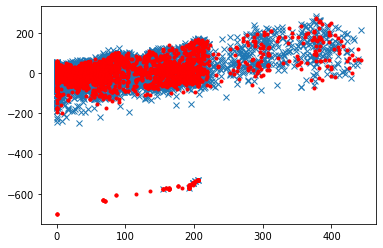

In [ ]:
import matplotlib.pyplot as plt

#Now let's plot our points residuals
#Often, we'd like to plot our data, but we have a 30+dimensional space, i.e. one that's hard to visualize
plt.plot(Y,residuals,'x')
plt.plot(Y_validation,residuals_validation,'r.')
plt.show()



Previously, we learned a weight vector, but because we didn't have a bias term, the weight vector has to go through the origin, which might not be what we want.  Let's try it all again with a bias term this time.

To add a bias term, we will add a new column to our X matrix that is full of constants.  

Does it matter what constant term we choose?

The simplest way to do this is to use `hstack` which takes in a list of matrices and horizontally concatenates them (i.e. adds on new columns -- there exists a `vstack` that adds new rows).  The simpleest way to construct a constant term is to use `np.ones` which takes in a list with the number of ones to make for each dimension.

e.g.
`np.ones([4,2])` will make

1 1

1 1 

1 1

1 1

#Step 4 -- Add a bias term
* Add a bias term to the independent data -- `X`
* Rerun the previous code 
* Compare the new errors to the old

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


RMSE with bias term: 37.20703983274873
RMSE Validation with bias term: 57.37765716615712


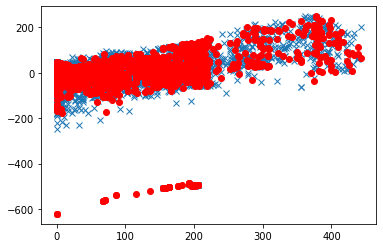

In [ ]:
#TODO construct an X matrix with a bias term. 

X_with_bias = np.hstack((np.ones([21000,1]),X))
X_validation_with_bias = np.hstack((np.ones([9000,1]),X_validation))
#TODO replace the np.zeros() with the correct code
B_with_bias = calculate_weights_with_library(X_with_bias,Y)

Yhat_with_bias = calculate_yhat(X_with_bias, B_with_bias)
Yhat_validation_with_bias = calculate_yhat(X_validation_with_bias, B_with_bias)

residuals_with_bias  = calculate_residuals(Y, Yhat_with_bias)
residuals_validation_with_bias  = calculate_residuals(Y_validation, Yhat_validation_with_bias)

rmse_with_bias = calculate_rmse(residuals_with_bias)
rmse_validation_with_bias = calculate_rmse(residuals_validation_with_bias)


print('RMSE with bias term:',rmse_with_bias)
print('RMSE Validation with bias term:',rmse_validation_with_bias)

plt.plot(Y,residuals_with_bias,'x')
plt.plot(Y_validation,residuals_validation_with_bias,'ro')
plt.show()

Now we are going to use artificial neural networks. We are going to be using PyTorch, one of the leading deep learning libraries. 

NOTE: We are going to be doing this in a GPU enabled way, so be sure to make sure your runtime is set to use a GPU -- Runtime > Change Runtime Type > Hardware Accelerator = GPU


First lets use stochastic gradient descent to train a weight vector as we did above.  

PyTorch lets us do this in a number of ways, but we will be doing the easiest possible one.  We are going to construct a `Sequential` model, with a `Linear` layer as its sole argument. `Sequential` can take in an arbitrary number of arguments, where each one is a layer that will be applied in the order that it is passed in.

The parameters you care about for `Linear` are:

`Linear(in_features, out_features, bias=True)`
    
`in_features` is the dimensionality of our input space -- in this case it will be the number of columns found in our X data
`out_features` is the dimensionality of the output space -- in this case, it will be 1 (all of our final `out_features` will always be 1, as our output is the single number we are predicting).  

# Step 5 -- Artificial Neural Network
* Construct a linear regression model in PyTorch

In [ ]:
import torch


#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(
    torch.nn.Linear(34, 1, bias=True)
)
model.to('cuda')

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1328,  0.1048, -0.0845, -0.0917,  0.0556,  0.0666,  0.0955, -0.0467,
          0.1154,  0.0719,  0.0414, -0.1317, -0.1458, -0.1259, -0.1676,  0.0226,
          0.0565, -0.0090, -0.0574,  0.0103, -0.0671, -0.0373, -0.1688, -0.0885,
         -0.0027, -0.0258,  0.1563,  0.1440,  0.1448, -0.0525, -0.0511,  0.0557,
         -0.1288,  0.0711]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0912], device='cuda:0', requires_grad=True)]


Given our model, it's now time to train it.  First we need to convert our numpy matrices into PyTorch Tensors.  

Then we need to set up a couple of things --

First, we need to choose which optimizer we are going to use.  For this, let's just go with simple stochastic gradient descent.  `torch.optim.SGD(model.parameters(),lr=LR)` -- you'll need to pick a learning rate.  It's usually best to pick something relatively small, like say 0.01.

Then we need to choose our loss function.  If our goal is to do a regression, we should choose the loss function we chose before, i.e. Mean Square Error --  `torch.nn.MSELoss()`


Then, we need to loop over our dataset a number of times, i.e. a number of *epochs*.  At each step of the process we need to:

1. Zero the gradients from the previous epoch -- `optimizer.zero_grad()` and `model.zero_grad()`
2. Run the model in the forward direction -- `Yhat = model.forward(Xt)`
3. Calculate the loss between our predictions and the truth -- `loss = loss_fn(Yhat,Yt)`
4. Calculate back propagation of the loss through the network -- `loss.backward()`
5. Run the stochastic gradient descent and update the weights -- `optimizer.step()`

Some libraries hide all of these aspects, but PyTorch makes you do them explicitly.  It results in a little more code, but allows for some very fancy models (those involving different losses being calculated independently) to be done with very little change in the code.

#Step 6 -- Training Your Model
* Set up your training method
* Set up your loss function 
* Run the training process as defined above

In [ ]:
torch.set_default_tensor_type(torch.cuda.FloatTensor)
# Convert our numpy arrays to torch tensors
Xt = torch.Tensor(X).to('cuda')
# To make Yt match the shape of Yhat, we'll need it to be a slightly different shape
Yt = torch.Tensor(Y.reshape((len(Y), 1))).to('cuda')



def train(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs:int) -> None:
    #TODO set the optimizer and loss functions
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

    #TODO set the loss function
    # We'll use mean squared error as our loss function
    loss_fn = torch.nn.MSELoss()
    for t in range(epochs):

        #TODO do the training steps here
        #1. zero the gradient buffers
        #1. Clear out the "gradient", i.e. the old update amounts
        optimizer.zero_grad()
        model.zero_grad()
        #2. Make a prediction
        Yhat = model.forward(Xt)
        #3. Calculate loss (the error of the residual)
        loss = loss_fn(Yhat,Yt)
        if t % 100 == 0:
            print(t,loss.item())

        #4. Run the loss backwards through the graph
        loss.backward()
        #5. Run the optimizer to update the weights
        optimizer.step()
train(Xt,Yt,model, 5000)

0 1384.9840087890625
100 1384.8975830078125
200 1384.8233642578125
300 1384.759521484375
400 1384.70458984375
500 1384.6571044921875
600 1384.6163330078125
700 1384.581298828125
800 1384.5511474609375
900 1384.525146484375
1000 1384.5028076171875
1100 1384.4835205078125
1200 1384.4669189453125
1300 1384.45263671875
1400 1384.4403076171875
1500 1384.4296875
1600 1384.4205322265625
1700 1384.4127197265625
1800 1384.406005859375
1900 1384.400146484375
2000 1384.395263671875
2100 1384.390869140625
2200 1384.3870849609375
2300 1384.384033203125
2400 1384.3812255859375
2500 1384.3787841796875
2600 1384.376708984375
2700 1384.375
2800 1384.37353515625
2900 1384.3721923828125
3000 1384.37109375
3100 1384.3701171875
3200 1384.369140625
3300 1384.368408203125
3400 1384.3680419921875
3500 1384.3673095703125
3600 1384.3668212890625
3700 1384.366455078125
3800 1384.3660888671875
3900 1384.3658447265625
4000 1384.365478515625
4100 1384.3653564453125
4200 1384.3651123046875
4300 1384.364990234375
440

Now we want to see how it did.  We will plot the residuals (i.e. the error) for both our training set and our validation set.  It is always important to have a validation set, as it will let us see how well our model is over (or under) fitting the data.

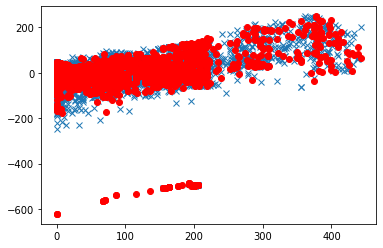

RMSE: 37.20704597316719
Validation RMSE: 57.37534172515892


In [ ]:
Yhat = model.forward(Xt).data.cpu().numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')


Yhat_validation = model.forward(torch.Tensor(X_validation)).data.cpu().numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


...And we do just about the same as we did before.

Now let's try it with some hidden layers.  Instead of just 1 Linear layer, we will have multiple layers.  As with the last one, we will have to specify the in_dimensions (identical to that one).  However, instead of an out_dimension of 1, we will go to the number of hidden_units, let's say 100.  Then we will have an output layer, which will go from our hidden_units dimension to an out_dimension of 1.

Again, your model summary should look similar to below (layer weights will be different)

#Step 7 -- Multi Layer Neural Network
* Create a neural network with 1 hidden layer (i.e. 2 layers, Input -> Hidden, Hidden -> Output)

In [ ]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(
    torch.nn.Linear(34, hidden_units, bias=True),
    torch.nn.Linear(hidden_units, 1, bias=True)
)

model.to('cuda')
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0893,  0.0229,  0.0736,  ...,  0.1667, -0.1017,  0.0707],
        [-0.1156, -0.0292,  0.1199,  ...,  0.1422, -0.0348, -0.0807],
        [-0.0579,  0.0223,  0.0605,  ...,  0.1543,  0.0069,  0.1219],
        ...,
        [ 0.1084,  0.0066, -0.0260,  ...,  0.0886,  0.0384, -0.0637],
        [ 0.0584, -0.0474, -0.1098,  ...,  0.0528, -0.1299, -0.0621],
        [ 0.0916, -0.1480, -0.1199,  ...,  0.1457, -0.0135, -0.1543]],
       requires_grad=True), Parameter containing:
tensor([ 0.1017, -0.0996, -0.0131, -0.1371, -0.0117,  0.1333, -0.0327, -0.0624,
        -0.1528,  0.0091,  0.1368, -0.0486,  0.0235,  0.1176, -0.1196,  0.0097,
        -0.0450, -0.0979, -0.1308,  0.1269,  0.0106,  0.1050,  0.0658,  0.0201,
         0.1410,  0.0215,  0.1465,  0.1687,  0.0085,  0.0360, -0.0272,  0.0845,
        -0.0409,  0.0835, -0.1707, -0.0367,  0.1120, -0.0098, -0.0645,  0.0668,
         0.0811,  0.1149,  0.1514,  0.1162,  0.0147,  0.1248,  0.0193,  0.0263,
         0.02

Copy your training code from above and let's see how well it does.

In [ ]:
train(Xt,Yt,model, 300)

0 9364.396484375
100 nan
200 nan


Hmmmm.....that's no good. Our loss quickly explodes and goes to nan.  This is cause by our stochastic gradient descent ping-ponging back and forth.  Instead of converging it keeps overshooting more and more until it goes beyond the floating point limit.  Obviously, that isn't what we want.

We can address this in one of 2 ways:

1. We can shrink out learning rate to a small enough value that this no longer occurs
2. We can clip our gradients to make sure they don't exceed a specific value

We can do it the first way, but that will slow our training.  The second can be achieved by adding a step into our training process:


1. Zero the gradients from the previous epoch -- `optimizer.zero_grad()` and `model.zero_grad()`
2. Run the model in the forward direction -- `Yhat = model.forward(Xt)`
3. Calculate the loss between our predictions and the truth -- `loss = loss_fn(Yhat,Yt)`
4. Calculate back propagation of the loss through the network -- `loss.backward()`
5. **Clip the gradients** -- `torch.nn.utils.clip_grad_norm_(model.parameters(),5)`
6. Run the stochastic gradient descent and update the weights -- `optimizer.step()`

Copy your model construction with the hidden layers from above, and then set up an optimization loop with gradient clipping.

#Step 8 -- Gradient Clipping
* Modify your training method from step 6 to add in Gradient Clipping

In [ ]:

def train_with_gradient_clipping(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs:int) -> None:
    #TODO set the optimizer and loss functions
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

    #TODO set the loss function
    # We'll use mean squared error as our loss function
    loss_fn = torch.nn.MSELoss()
    for t in range(epochs):
        #TODO do the training steps here
        #1. zero the gradient buffers
        #1. Clear out the "gradient", i.e. the old update amounts
        optimizer.zero_grad()
        model.zero_grad()
        #2. Make a prediction
        Yhat = model.forward(Xt)
        #3. Calculate loss (the error of the residual)
        loss = loss_fn(Yhat,Yt)
        if t % 100 == 0:
            print(t,loss.item())

        #4. Run the loss backwards through the graph
        loss.backward()
        #5. Clip the gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(),5)
        #6. Run the optimizer to update the weights
        optimizer.step()

train_with_gradient_clipping(Xt,Yt,model, 5000)

0 9338.669921875
100 6069.66162109375
200 3724.80908203125
300 2430.046875
400 1874.3721923828125
500 1650.302490234375
600 1526.802490234375
700 1460.3353271484375
800 1425.4503173828125
900 1407.4342041015625
1000 1398.2156982421875
1100 1393.519775390625
1200 1391.1300048828125
1300 1389.9117431640625
1400 1389.287841796875
1500 1388.96630859375
1600 1388.798583984375
1700 1388.7095947265625
1800 1388.6612548828125
1900 1388.6339111328125
2000 1388.6175537109375
2100 1388.6070556640625
2200 1388.5994873046875
2300 1388.5938720703125
2400 1388.5892333984375
2500 1388.5850830078125
2600 1388.5814208984375
2700 1388.577880859375
2800 1388.5745849609375
2900 1388.5711669921875
3000 1388.5682373046875
3100 1388.565185546875
3200 1388.5621337890625
3300 1388.5592041015625
3400 1388.556396484375
3500 1388.553466796875
3600 1388.5506591796875
3700 1388.5478515625
3800 1388.545166015625
3900 1388.54248046875
4000 1388.53955078125
4100 1388.5369873046875
4200 1388.5341796875
4300 1388.5313720

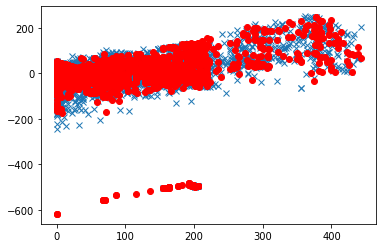

RMSE: 37.26275585112708
Validation RMSE: 57.180418416086624


In [ ]:
Yhat = model.forward(Xt).data.cpu().numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')


Yhat_validation = model.forward(torch.Tensor(X_validation)).data.cpu().numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


Wait, that looks just like it did before!  The key to neural networks comes from the non-linear activations.  No matter how many layers we add, so long as the rank of the hidden layers is $\geq$ the rank of the original vector, the best we can do is the least squares estimation (as it is the maximum likelihood estimator for a linear regression).  If the rank is decreased, then we are doing some form of compression, akin to Principal Component Analysis.  Let's try it with a bit of nonlinearity. 

Let's do a single hidden layer with a non-linear activation -- we will use the Rectified Linear Unit (ReLU) as it is fast and all we really care about is ANY kind of nonlinearity (sometimes we care about our nonlinearity having a specific meaning or mapping into a specific range (0 to 1, -1 to 1, etc.).

This means we should now have a Sequential model with

1. A Linear layer going from our input dimension to the number of hidden units
2. A ReLU activation layer -- `torch.nn.ReLU()`
3. A Linear layer going from our hidden units to 1


#Step 9 -- Create a non-linear multi layer Neural Network
* Your network should be two layers like above, but should have a non-linear activation function (the ReLU) (e.g.  Input -> Hidden, ReLU, Hidden -> Output)


In [ ]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(
    torch.nn.Linear(34, hidden_units, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_units, 1, bias=True)
)


model.to('cuda')
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1624,  0.0470,  0.0755,  ...,  0.0011,  0.0089,  0.1533],
        [ 0.0298, -0.0026, -0.1026,  ..., -0.0569, -0.0500,  0.1169],
        [-0.0738,  0.0663, -0.1009,  ...,  0.1159,  0.1325,  0.0628],
        ...,
        [ 0.1352, -0.0422,  0.1561,  ..., -0.0647, -0.0406,  0.1563],
        [ 0.0242, -0.1506, -0.0549,  ...,  0.0721, -0.1472,  0.1680],
        [ 0.0040,  0.1011, -0.0171,  ..., -0.0991,  0.0980, -0.1301]],
       requires_grad=True), Parameter containing:
tensor([-0.0547, -0.0293,  0.1632,  0.0226, -0.0878, -0.0447,  0.0398, -0.1211,
         0.1473,  0.0961, -0.0792, -0.0726,  0.1267,  0.0557,  0.1324, -0.1683,
         0.1239,  0.1079,  0.0845, -0.0499,  0.1268, -0.0414,  0.1278,  0.1222,
         0.0182,  0.1020,  0.1553, -0.1130,  0.0924, -0.0974,  0.0277, -0.0757,
         0.1655, -0.0084, -0.1042,  0.1354,  0.1260, -0.0666, -0.1473,  0.0636,
        -0.0108,  0.0379, -0.1289, -0.1547, -0.1314, -0.0880,  0.1702,  0.1324,
         0.12

Use the optimization code with the gradient clipping from above to train our new, non-linear, model.  I recommend letting it run for about 10000 epochs.


In [ ]:

train_with_gradient_clipping(Xt,Yt,model, 10000)

0 9410.4677734375
100 6291.63623046875
200 3877.6845703125
300 2445.5869140625
400 1690.7811279296875
500 1167.046875
600 973.5506591796875
700 907.6096801757812
800 875.5670166015625
900 853.8954467773438
1000 836.462646484375
1100 820.5987548828125
1200 804.9932250976562
1300 789.1663818359375
1400 772.6085815429688
1500 754.554443359375
1600 734.3991088867188
1700 712.4474487304688
1800 688.8069458007812
1900 664.3385620117188
2000 639.552734375
2100 615.0418090820312
2200 591.3115234375
2300 568.7240600585938
2400 547.5521240234375
2500 527.859619140625
2600 509.6075744628906
2700 492.8703308105469
2800 477.4490966796875
2900 463.2735290527344
3000 450.30242919921875
3100 438.3020935058594
3200 427.3118896484375
3300 417.1413879394531
3400 407.732666015625
3500 399.00067138671875
3600 390.9758605957031
3700 383.57421875
3800 376.713134765625
3900 370.2835388183594
4000 364.2748718261719
4100 358.68359375
4200 353.4311828613281
4300 348.4703369140625
4400 343.8040771484375
4500 339.

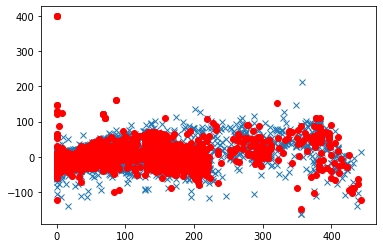

RMSE: 15.621760731436892
Validation RMSE: 17.33421776556358


In [ ]:
Yhat = model.forward(Xt).data.cpu().numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')


Yhat_validation = model.forward(torch.Tensor(X_validation)).data.cpu().numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


Ah, that looks better.  Note, you are probably overfitting (it is the tendency of these techniques), you can try some form of regularization (e.g., dropout) to reduce this overfitting for extra-credit.  

You can try to explore different network topologies (different numbers of layers, different activation functions) and different training techniques to see how well you can do on the validation set.

Now, let's use this as a heuristic for our search.

Below are the helper functions needed -- use them in your A* implementation

#BONUS -- A*
* Implement A* search for the MineCraft planning domain, using the above estimates as  heuristics

In [ ]:
import json
from typing import NamedTuple, Dict, Tuple, Optional, Sequence, List, Set, FrozenSet
import array
import heapq
import time
import itertools

with open('Crafting.json') as f:
    Crafting = json.load(f)
items_by_index = list(sorted(Crafting['Items']))
items_to_indices = {item: index for index, item in enumerate(items_by_index)}

class State:

    def __init__(self, items=None) :
        if items is not None:
            # Copying a state from an old state.
            # This call to the array constructor creates an array of unsigned integers and initializes it from the contents of items.
            self.items = array.array('I', items)
        else:
            self.items = array.array('I', [0 for item in items_by_index])

    def __add__(self, other):
        s = State(self.items)
        # A. How do we add together the contents of two states?
        for ii,oi in enumerate(other.items):
            s.items[ii] += oi
        return s
    def __sub__(self, other):
        s = State(self.items)
        # A. How do we add together the contents of two states?
        for ii,oi in enumerate(other.items):
            s.items[ii] -= oi
        return s

    def __ge__(self, other):
        # C. How do we know whether one state (self) contains everything that's inside of another (other)? 
        for si,oi in zip(self.items,other.items):
            if si < oi:
                return False
        return True
        
    def __lt__(self, other):
        return not (self >= other)

    def __eq__(self, other):
        return self.items == other.items

    def __hash__(self):
        hsh = 5381
        for s in self.items:
            hsh = ((hsh << 5) + hsh) + s
        return hsh

    def __str__(self):
        out_str = []
        for k,v  in self.to_dict().items():
            out_str.append('{}:{}'.format(k,v))
        return ','.join(out_str)

    def to_dict(self):
        return {items_by_index[idx]: self.items[idx]
                for idx in range(len(self.items))}

    @classmethod
    def from_dict(cls, item_dict: Dict[str, int]) -> 'State':
        return cls([
            item_dict.get(item, 0) for item in items_by_index
        ])
    
class Recipe(NamedTuple):
    produces: State
    consumes: State
    requires: State
    cost: int

recipes: Dict[str, Recipe] = {}
for name, rule in Crafting['Recipes'].items():
    recipes[name] = Recipe(
        State.from_dict(rule.get('Produces', {})),
        State.from_dict(rule.get('Consumes', {})),
        State.from_dict({item: 1 if req else 0
                         for item, req in rule.get('Requires', {}).items()}),
        rule['Time']
    )
    
def preconditions_satisfied(state: State, recipe: Recipe) -> bool:
    return state >= recipe.consumes and state >= recipe.requires

def apply_effects(state: State, recipe: Recipe) -> State:
    return state-recipe.consumes+recipe.produces

In [ ]:
import random

def states_to_tensor(initial_state:State , goal_state:State) -> torch.Tensor:
    items = ['bench','cart','coal','cobble',
     'furnace','ingot','iron_axe',
     'iron_pickaxe','ore','plank','rail',
     'stick','stone_axe','stone_pickaxe',
     'wood','wooden_axe','wooden_pickaxe']
    data = []
    initial_state = initial_state.to_dict()
    goal_state = goal_state.to_dict()
    for i in items:
        data.append([initial_state[i]])
    for i in items:
        data.append([goal_state[i]])
    return torch.Tensor(np.array(data).T)


def get_heuristic(current_state:State , goal_state:State) -> float:
    return model.forward(states_to_tensor(current_state,goal_state)).data.numpy()[0,0]


pruning = [State.from_dict({'cobble':9}),
           State.from_dict({'wood':3}),
           State.from_dict({'plank':9}),
           State.from_dict({'ore':2}),
           State.from_dict({'stick':6}),
           State.from_dict({'bench':2}),
           State.from_dict({'furnace':2}),
           State.from_dict({'iron_axe':2}),
           State.from_dict({'iron_pickaxe':2}),
           State.from_dict({'stone_axe':2}),
           State.from_dict({'stone_pickaxe':2}),
           State.from_dict({'wooden_axe':2}),
           State.from_dict({'wooden_pickaxe':2}),
           State.from_dict({'coal':2})]

def prune(state:State) -> bool:
    to_prune = False
    for p in pruning:
        if state >= p:
            to_prune = True
            break
                        
    return to_prune

In [ ]:

#TODO implement A* search
#It should return a tuple of the number of states visited, the time cost, 
#and the path of recipes it takes (as a list of recipe names)
#Break the loop when you have visited max_nodes
#I recommend using the above prune method after applying a recipe 
#but before adding a node to the open set


def a_star(initial:State, goal:State, max_nodes:int) -> Tuple[int, int,Optional[List[str]]]:
    pass

In [ ]:
#test code
print(a_star(State.from_dict({'wood':1}),State.from_dict({'wooden_pickaxe':1}),1000))
print(a_star(State.from_dict({'wood':1}),State.from_dict({'iron_pickaxe':1}),20000))
print(a_star(State.from_dict({}),State.from_dict({'rail':1}),20000))
print(a_star(State.from_dict({}),State.from_dict({'cart':1}),20000))
